In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.impute import SimpleImputer
import warnings
import plotly.graph_objects as go

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"pokemon-1.csv")
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
against_bug,801.0,9.962547e-01,0.597248,0.25,0.5,1.0,1.0,4.0
against_dark,801.0,1.057116e+00,0.438142,0.25,1.0,1.0,1.0,4.0
against_dragon,801.0,9.687890e-01,0.353058,0.00,1.0,1.0,1.0,2.0
against_electric,801.0,1.073970e+00,0.654962,0.00,0.5,1.0,1.0,4.0
against_fairy,801.0,1.068976e+00,0.522167,0.25,1.0,1.0,1.0,4.0
against_fight,801.0,1.065543e+00,0.717251,0.00,0.5,1.0,1.0,4.0
against_fire,801.0,1.135456e+00,0.691853,0.25,0.5,1.0,2.0,4.0
against_flying,801.0,1.192884e+00,0.604488,0.25,1.0,1.0,1.0,4.0
against_ghost,801.0,9.850187e-01,0.558256,0.00,1.0,1.0,1.0,4.0
against_grass,801.0,1.034020e+00,0.788896,0.25,0.5,1.0,1.0,4.0


# Data Loading and Initial Exploration

### Change the position of the name attribute

In [5]:
df.insert(0, 'name', df.pop('name'))   # done to easily identify names
df.head()

,name,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,Bulbasaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,Ivysaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,Venusaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,Charmander,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,Charmeleon,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


### Null Values

In [6]:
df.isnull().sum()

name                   0
abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


$ \implies $ <b>"height_m"</b> has 20 Null Values.<p>
$ \implies $ <b>"weight_kg"</b> has 20 Null Values.<p>
$ \implies $ <b>"percentage_male"</b> has 98 Null Values.<p>
$ \implies $ <b>"type2"</b> has 384 Null values.<p>

### Data Imputation

In [7]:
# Fill missing values in type2 column with type1 column
df['type2'].fillna(df['type1'], inplace=True)

# Fill missing values in height_m column with average of the column
df['height_m'].fillna(np.round(df['height_m'].mean(), 2), inplace=True)

# Fill missing values in weight_kg column with average of the column
df['weight_kg'].fillna(np.round(df['weight_kg'].mean()), inplace=True)

# Add a new column called 'genderless' that is 1 if the Pokemon is genderless and 0 if it is not
df['genderless'] = np.where(df['percentage_male'].isna(), 1, 0)

# Fill missing values in percentage_male column with 50
df['percentage_male'].fillna(50, inplace=True)

In [8]:
df.isnull().sum()

name                 0
abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classfication        0
defense              0
experience_growth    0
height_m             0
hp                   0
japanese_name        0
percentage_male      0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
type2                0
weight_kg            0
generation           0
is_legendary         0
genderless           0
dtype: int64

### capture_rate attribute

In [9]:
for i in df.capture_rate:
    print(i, end=", ")

45, 45, 45, 45, 45, 45, 45, 45, 45, 255, 120, 45, 255, 120, 45, 255, 120, 45, 255, 127, 255, 90, 255, 90, 190, 75, 255, 90, 235, 120, 45, 235, 120, 45, 150, 25, 190, 75, 170, 50, 255, 90, 255, 120, 45, 190, 75, 190, 75, 255, 50, 255, 90, 190, 75, 190, 75, 190, 75, 255, 120, 45, 200, 100, 50, 180, 90, 45, 255, 120, 45, 190, 60, 255, 120, 45, 190, 60, 190, 75, 190, 60, 45, 190, 45, 190, 75, 190, 75, 190, 60, 190, 90, 45, 45, 190, 75, 225, 60, 190, 60, 90, 45, 190, 75, 45, 45, 45, 190, 60, 120, 60, 30, 45, 45, 225, 75, 225, 60, 225, 60, 45, 45, 45, 45, 45, 45, 45, 255, 45, 45, 35, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 25, 3, 3, 3, 45, 45, 45, 3, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 255, 90, 255, 90, 255, 90, 255, 90, 90, 190, 75, 190, 150, 170, 190, 75, 190, 75, 235, 120, 45, 45, 190, 75, 65, 45, 255, 120, 45, 45, 235, 120, 75, 255, 90, 45, 45, 30, 70, 45, 225, 45, 60, 190, 75, 190, 60, 25, 190, 75, 45, 25, 190, 45, 60, 120, 60, 190, 75, 225, 75, 60, 190, 75, 45, 25, 25, 120, 45, 45,

$ \implies $ As we can see in the output values there is one value <b>"30 (Meteorite)255 (Core)"</b>.

In [10]:
df[df["capture_rate"]=="30 (Meteorite)255 (Core)"]

,name,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,genderless
773,Minior,['Shields Down'],0.5,1.0,1.0,2.0,1.0,1.0,0.5,0.5,...,774,100,60,120,rock,flying,40.0,7,0,1


$ \implies $ We know its a rock/fly type pokemon, therefore, we will replace it with <b>"Meteorite"</b> capture_rate of 30.

In [11]:
# replacing with 30
df["capture_rate"].replace({"30 (Meteorite)255 (Core)": "30"}, inplace=True)

# converting into integer type attribute
df["capture_rate"] = df["capture_rate"].astype('int')
df["capture_rate"].dtype

dtype('int32')

In [12]:
df.shape

(801, 42)

### Dropping unncessary attributes

In [13]:
df.drop(columns=['japanese_name', 'pokedex_number', 'percentage_male'], axis=1, inplace=True) 

In [14]:
import ast
df["abilities"] = df["abilities"].apply(ast.literal_eval) #chuyển dạng chuỗi thành dạng list

In [15]:
# adding total abilities that a pokemon has
df["tot_abilities"] = df.apply(lambda x: len(x["abilities"]), axis=1)
df.head()

,name,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,...,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,genderless,tot_abilities
0,Bulbasaur,"[Overgrow, Chlorophyll]",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,65,65,45,grass,poison,6.9,1,0,0,2
1,Ivysaur,"[Overgrow, Chlorophyll]",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,80,80,60,grass,poison,13.0,1,0,0,2
2,Venusaur,"[Overgrow, Chlorophyll]",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,122,120,80,grass,poison,100.0,1,0,0,2
3,Charmander,"[Blaze, Solar Power]",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,60,50,65,fire,fire,8.5,1,0,0,2
4,Charmeleon,"[Blaze, Solar Power]",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,80,65,80,fire,fire,19.0,1,0,0,2


In [16]:
# merging type1 and type2 and adding into new column=> type, 
# and renaming type1 to primary and type2 to secondary
df['type'] =  df.apply(lambda x: x['type1'] if pd.isnull(x['type2']) else f'{x["type1"]}_{x["type2"]}', axis=1)
df.rename(columns = {'type1':'primary type', 'type2':'secondary type'}, inplace = True)

# Checking the final shape of df before moving into visualizations
df.shape

(801, 41)

In [17]:
df

,name,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,...,sp_defense,speed,primary type,secondary type,weight_kg,generation,is_legendary,genderless,tot_abilities,type
0,Bulbasaur,"[Overgrow, Chlorophyll]",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,65,45,grass,poison,6.9,1,0,0,2,grass_poison
1,Ivysaur,"[Overgrow, Chlorophyll]",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,80,60,grass,poison,13.0,1,0,0,2,grass_poison
2,Venusaur,"[Overgrow, Chlorophyll]",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,120,80,grass,poison,100.0,1,0,0,2,grass_poison
3,Charmander,"[Blaze, Solar Power]",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,50,65,fire,fire,8.5,1,0,0,2,fire_fire
4,Charmeleon,"[Blaze, Solar Power]",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,65,80,fire,fire,19.0,1,0,0,2,fire_fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,Celesteela,[Beast Boost],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,...,101,61,steel,flying,999.9,7,1,1,1,steel_flying
797,Kartana,[Beast Boost],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,...,31,109,grass,steel,0.1,7,1,1,1,grass_steel
798,Guzzlord,[Beast Boost],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,...,53,43,dark,dragon,888.0,7,1,1,1,dark_dragon
799,Necrozma,[Prism Armor],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,...,89,79,psychic,psychic,230.0,7,1,1,1,psychic_psychic


# Data Analysis 

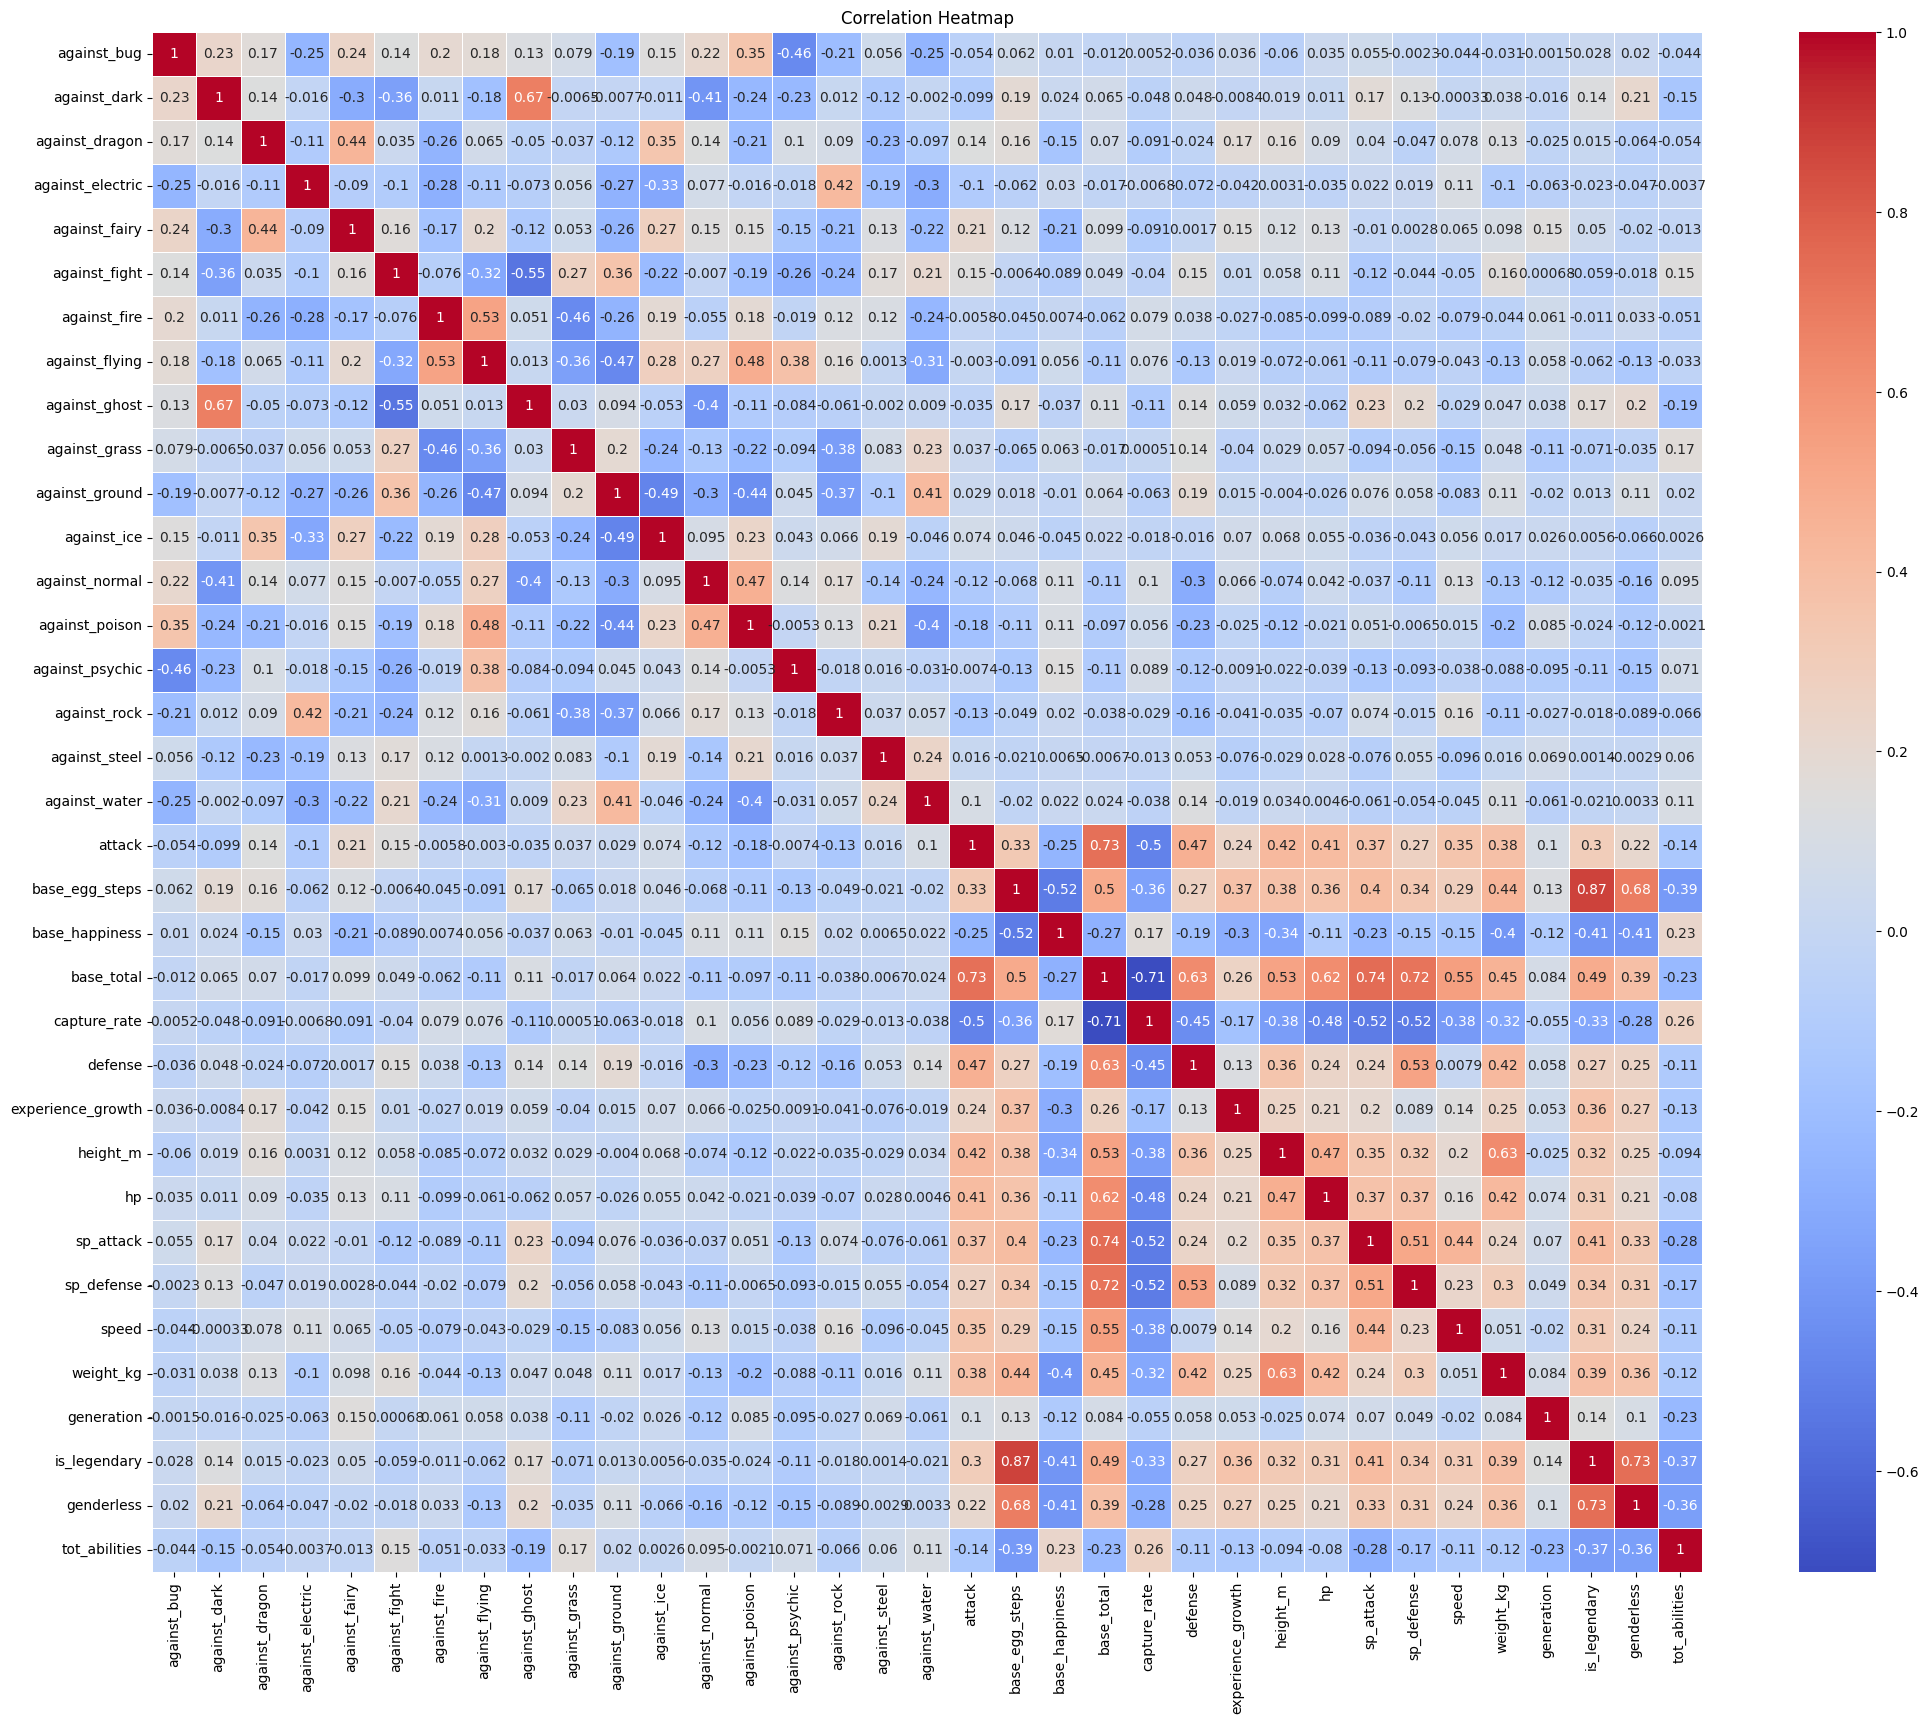

In [18]:
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True,  cmap='coolwarm', linewidths=0.5).set_title("Correlation Heatmap")
plt.show()

In [19]:
against=[]
rest=[]
for i in df.columns:
    if 'against' in i:
        against.append(i)
    else:
        rest.append(i)

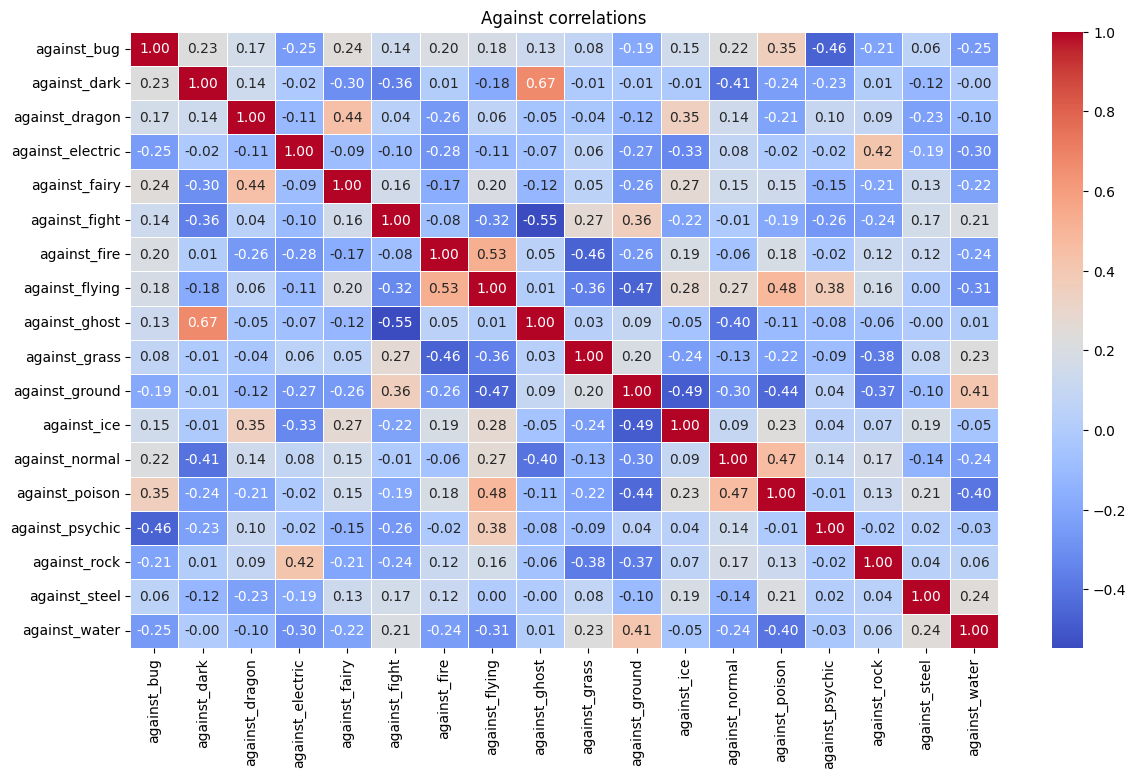

In [20]:
plt.figure(figsize=(14, 8))
sns.heatmap(df[against].corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt= '.2f')
plt.title("Against correlations")
plt.show()

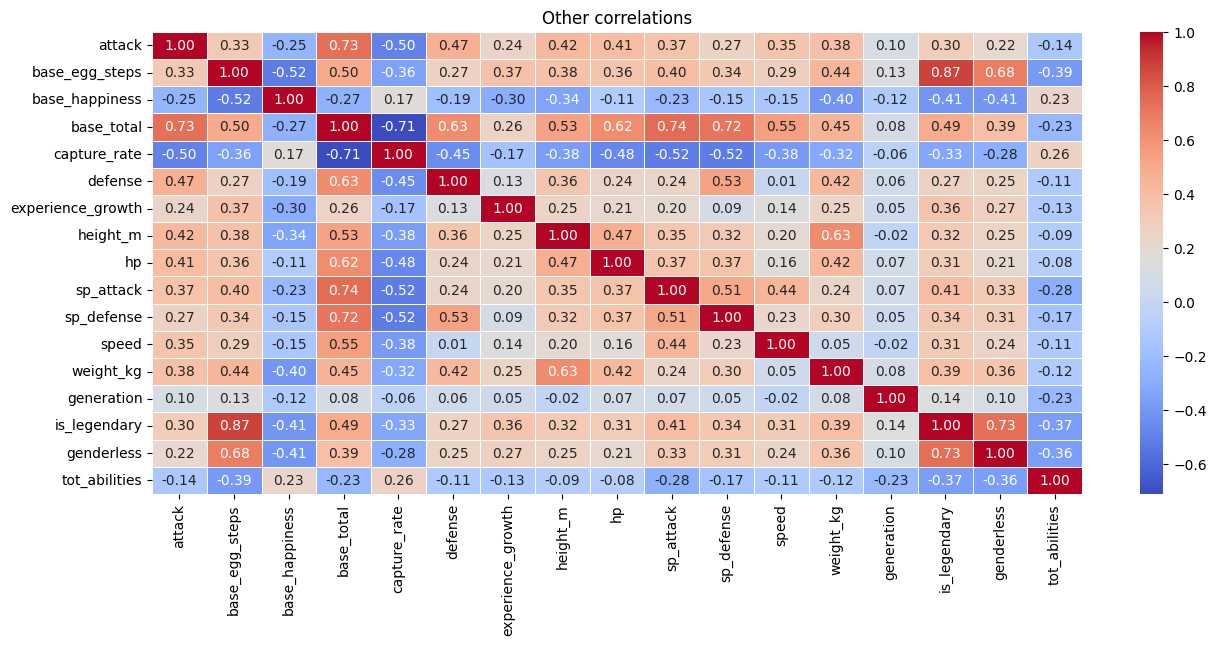

In [21]:
plt.figure(figsize=(15, 6))
sns.heatmap(df[rest].corr(numeric_only=True), annot=True,  cmap='coolwarm', linewidths=0.5, fmt= '.2f').set_title("Other correlations")
plt.show()

$ \implies $ <b>base_total</b> has good correlation with <b><i>attack, defense, sp_attack, and sp_defense</i></b>.<p>
$ \implies $ <b>base_egg_steps</b> have a huge correlation with <b><i>is_legendary</b></i> attribute.<p>
$ \implies $ <b>weight_kg</b> is also very correlated with <b><i>height_m</b></i>.</p>

# Visualizations

### 1. Count of Pokemons per generation

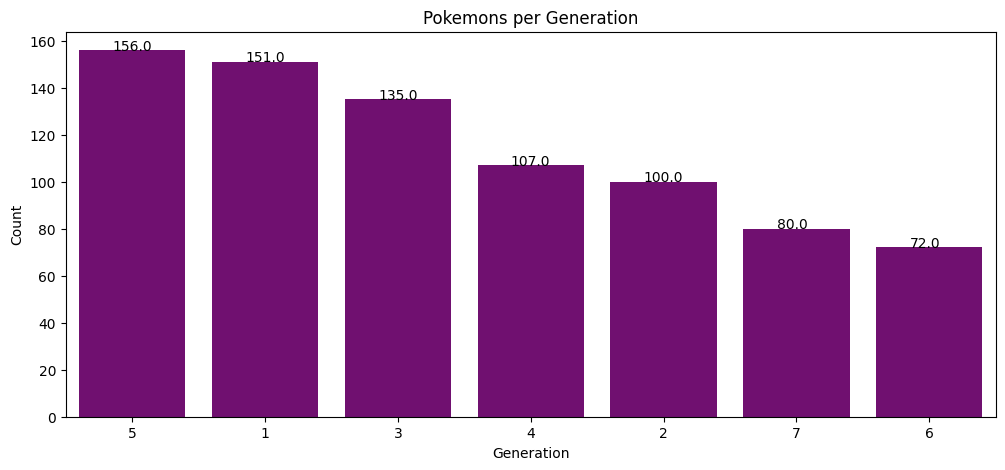

In [22]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='generation',data=df,order=df['generation'].value_counts().index,color='Purple')
ax.set_title('Pokemons per Generation')
ax.set(xlabel='Generation',ylabel='Count')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

### 2. Distribution of Primary and Secondary Types of pokemon

In [23]:
# Đếm số lượng Pokémon theo loại chính
primary_type_counts = df['primary type'].value_counts()

# Tạo biểu đồ tròn
fig = go.Figure(data=[go.Pie(
    labels=primary_type_counts.index,
    values=primary_type_counts,
    hoverinfo='label+value+percent',  # Hiện thị nhãn, số lượng và phần trăm
    textinfo='label+percent',  # Hiển thị nhãn và phần trăm trên biểu đồ
    textposition='inside'  # Đặt vị trí của văn bản bên trong biểu đồ
)])


# Cài đặt tiêu đề cho biểu đồ và kích thước
fig.update_layout(
    title_text='Distribution of Primary Types',
    showlegend=True,  # Hiển thị chú giải
    height=800,      # Chiều cao
    width=1000       # Chiều rộng
)
# Hiển thị biểu đồ
fig.show()




# Đếm số lượng Pokémon theo loại chính
secondary_type_counts = df['secondary type'].value_counts()

# Tạo biểu đồ tròn
fig = go.Figure(data=[go.Pie(
    labels=secondary_type_counts.index,
    values=secondary_type_counts,
    hoverinfo='label+value+percent',  # Hiện thị nhãn, số lượng và phần trăm
    textinfo='label+percent',  # Hiển thị nhãn và phần trăm trên biểu đồ
    textposition='inside'  # Đặt vị trí của văn bản bên trong biểu đồ
)])


# Cài đặt tiêu đề cho biểu đồ và kích thước
fig.update_layout(
    title_text='Distribution of Secondary Types',
    showlegend=True,  # Hiển thị chú giải
    height=800,      # Chiều cao
    width=1000       # Chiều rộng
)
# Hiển thị biểu đồ
fig.show()

* Most occured pokemon type:<p>
    * Primary type = Water Type<p>
    * Secondary type = None; followed by flying type<p>
* Least occured pokemon type:<p>
    * Primary type = flying<p>
    * Secondary type = normal<p>

### 3. Types of Pokemons in each Generation

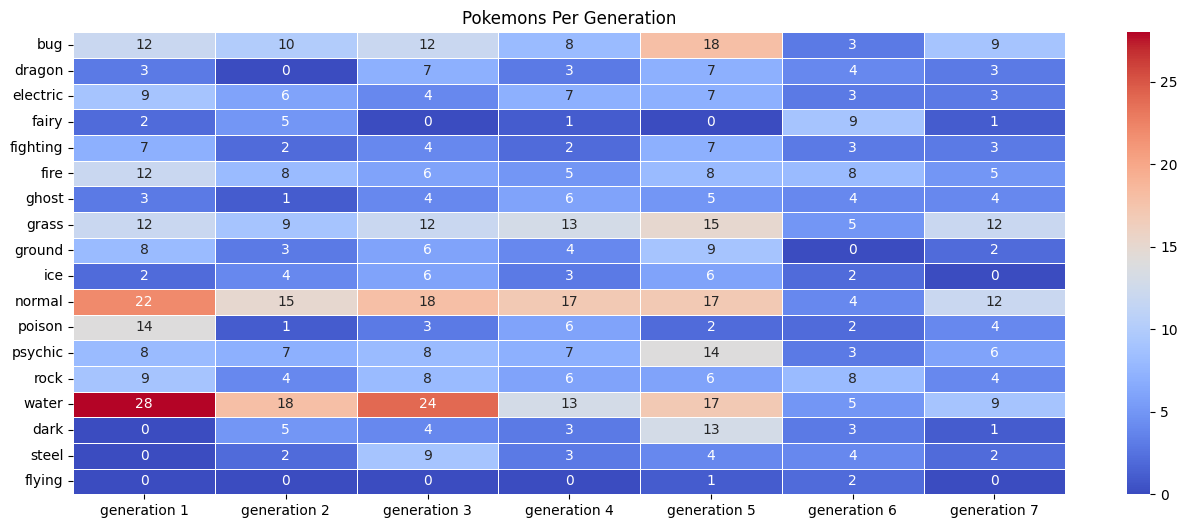

In [24]:
primary_type_generation_group = df.groupby(['generation', 'primary type'])['name'].count().to_frame().reset_index()
primary_type_generation_group.rename(columns={'name' : 'name_count'}, inplace=True)
primary_type_generation_dict  = {}
for generation in list(primary_type_generation_group['generation'].unique()):
    current_generation = []
    for p_type in primary_type_generation_group['primary type'].unique():
        try:
            current_generation.append(
                primary_type_generation_group.loc[(primary_type_generation_group['generation']==generation) 
                                        & (primary_type_generation_group['primary type'] == p_type)]['name_count'].values[0])
        except IndexError:
            current_generation.append(0)
    primary_type_generation_dict[f'generation {generation}'] = current_generation

p_type_by_generation = pd.DataFrame(primary_type_generation_dict, index= primary_type_generation_group['primary type'].unique())
fig,axes = plt.subplots(figsize=(16,6))
sns.heatmap(p_type_by_generation, annot=True, cmap='coolwarm', linewidths=0.5).set_title('Pokemons Per Generation')
plt.show()

* Only Gen 5 & 6 have flying type pokemons
* In Gen 1, there is no dark, steel & flying type pokemons
* In Gen 1, 2, & 3, water type pokemons are most common
* In Gen 4, normal type pokemons are most common
* In Gen 5, bug type pokemons are most common
* In Gen 6, fairy type pokemons are most common
* In Gen 7, normal & grass type pokemons are most common

### 4. Easiest / Hardest Pokemon Type to catch

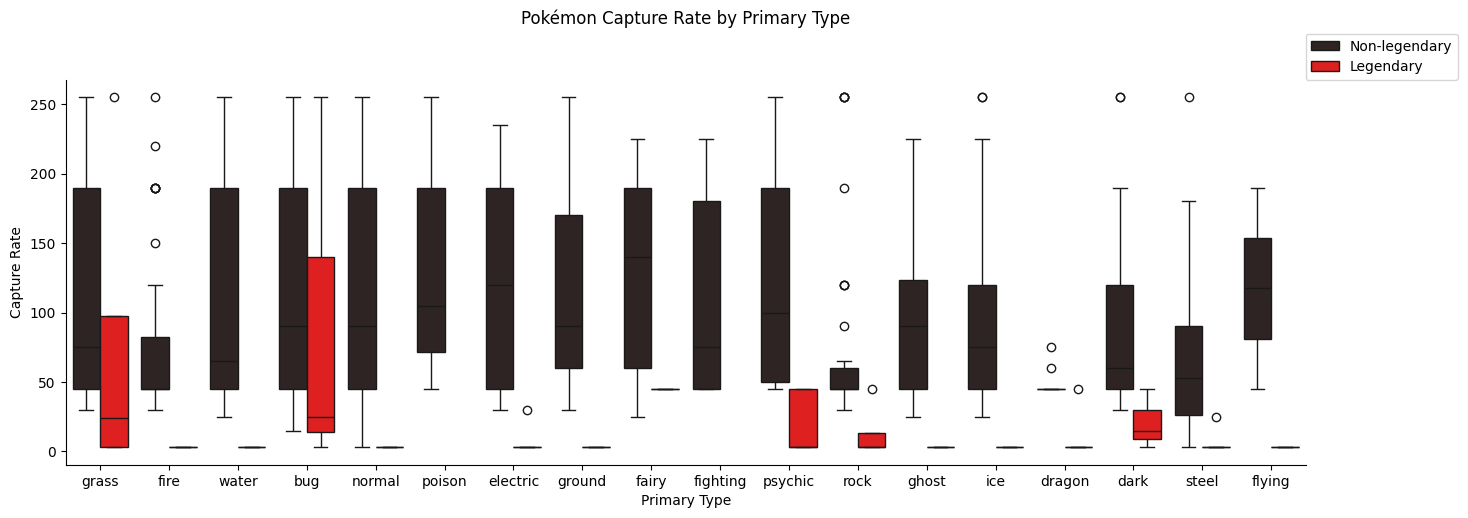

In [25]:
plt.figure(figsize=(16,5))
ax = sns.boxplot(x='primary type',y='capture_rate', hue='is_legendary', data = df, color="red")

ax.set_xlabel(xlabel='Primary Type')
ax.set_ylabel(ylabel='Capture Rate')
ax.set_title('Pokémon Capture Rate by Primary Type', pad=40)

sns.despine(top=True, right=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Non-legendary', 'Legendary'], loc=(1,1))

<i>The easiest pokemon type to catch is <b>"fairy"</b> and hardest to catch is <b>"dragon"</b> type.<br>
It is also hard to catch<b> "rock"</b> and<b> "fire"</b> type pokemons. <p>
In legendary pokemons, easiest to catch are from<b> "bug" </b>and<b> "grass"</b> types.

### 5. Strongest Pokemon

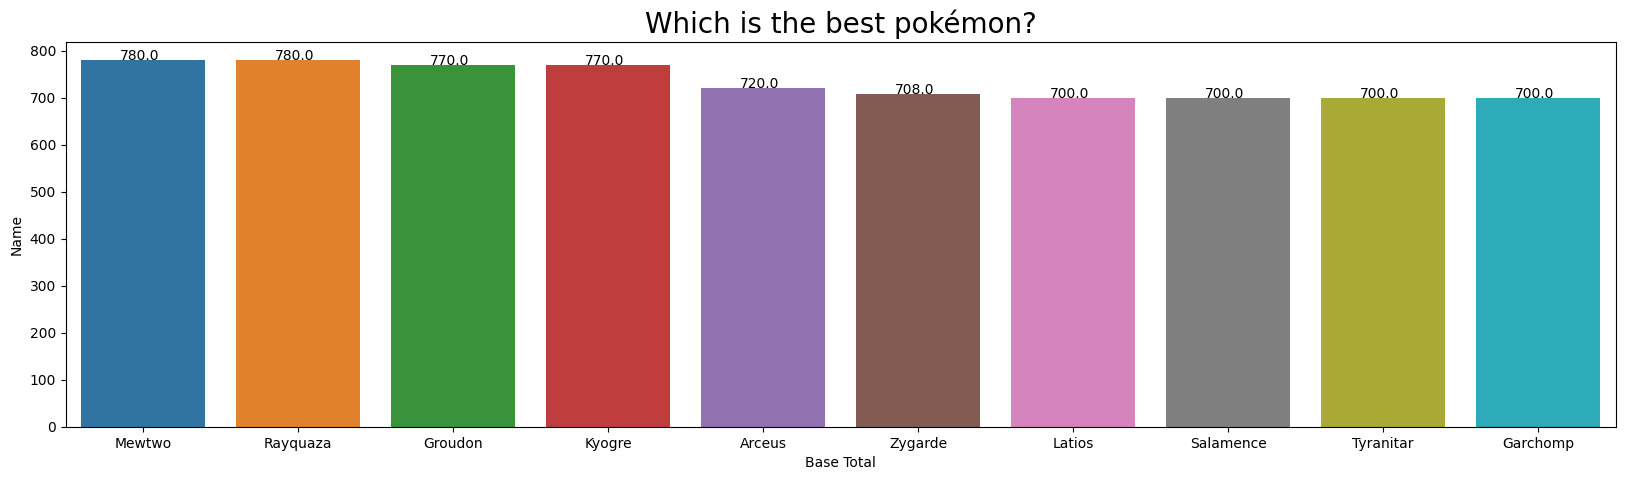

In [26]:
top10_pokemon_base_total = df.sort_values(by="base_total", ascending=False).reset_index()[:10]
plt.figure(figsize=(20,5))
ax = sns.barplot(x=top10_pokemon_base_total["name"], y=top10_pokemon_base_total["base_total"], orient='v', hue=top10_pokemon_base_total["name"])
ax.set_title("Which is the best pokémon?", size=20)
ax.set(xlabel="Base Total", ylabel="Name")
for p in ax.patches:
    ax.annotate('{:.1f}'.format( p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

<i>SO, the strongest pokemons being <b>Mewtwo, Rayquaza</b>, followed by <b>Groudon, Kyogre, </b>and others.

### 6. Weakest Pokemon

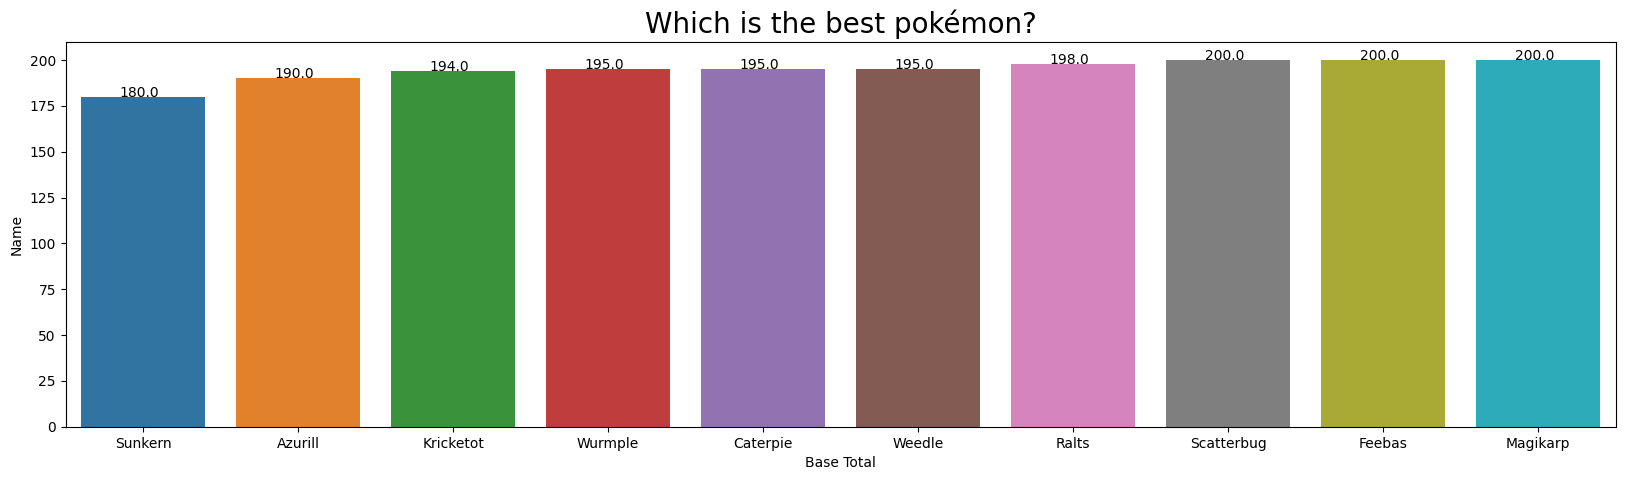

In [27]:
top10_pokemon_base_total = df.sort_values(by="base_total", ascending=True).reset_index()[:10]
plt.figure(figsize=(20, 5))
ax = sns.barplot(x=top10_pokemon_base_total["name"], y=top10_pokemon_base_total["base_total"], orient='v', hue=top10_pokemon_base_total["name"])
ax.set_title("Which is the best pokémon?", size=20)
ax.set(xlabel="Base Total", ylabel="Name")
for p in ax.patches:
    ax.annotate('{:.1f}'.format( p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

<i>So, the weakest pokemon is <b>Sunkern</b>, followed by <b>Azurill, Kricketot</b>, and others.

### 7. Count of legendary pokemons

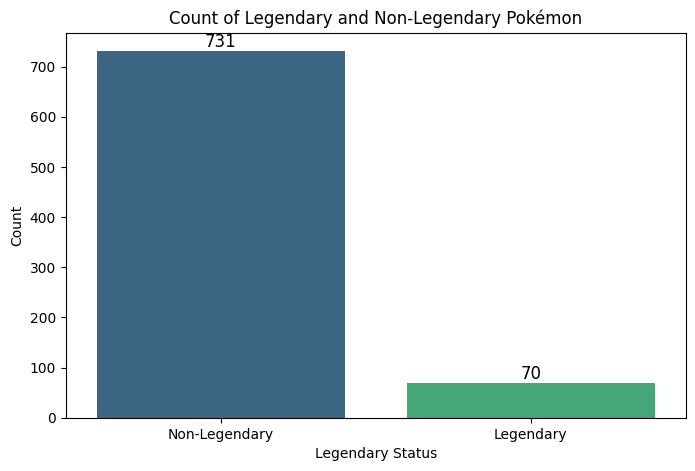

In [28]:
legendary_counts = df['is_legendary'].value_counts()

plt.figure(figsize=(8, 5))
bar = sns.barplot(x=legendary_counts.index, y=legendary_counts.values, palette="viridis")
plt.xlabel('Legendary Status')
plt.ylabel('Count')
plt.title('Count of Legendary and Non-Legendary Pokémon')
plt.xticks(ticks=[0, 1], labels=['Non-Legendary', 'Legendary'])

for i in range(len(legendary_counts)):
    bar.text(i, legendary_counts.values[i] + 0.1, legendary_counts.values[i], ha='center', va='bottom', fontsize=12)

plt.show()

### 8. What is the most common type among legendary pokemons?

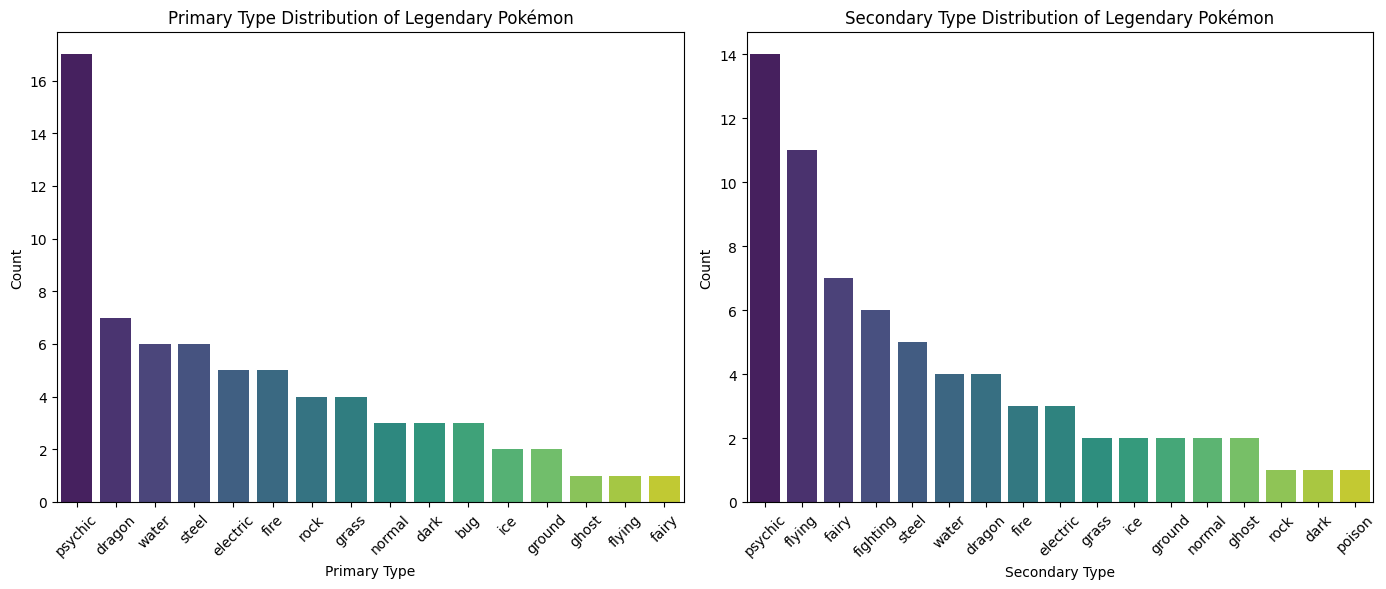

In [29]:
# Filter for legendary Pokémon
legendary_pokemon = df[df['is_legendary']==1]

# Count primary and secondary types
primary_type_counts = legendary_pokemon['primary type'].value_counts()
secondary_type_counts = legendary_pokemon['secondary type'].value_counts(dropna=False)

# Plot the distribution of primary types
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=primary_type_counts.index, y=primary_type_counts.values, palette="viridis")
plt.xlabel('Primary Type')
plt.ylabel('Count')
plt.title('Primary Type Distribution of Legendary Pokémon')
plt.xticks(rotation=45)

# Plot the distribution of secondary types
plt.subplot(1, 2, 2)
sns.barplot(x=secondary_type_counts.index, y=secondary_type_counts.values, palette="viridis")
plt.xlabel('Secondary Type')
plt.ylabel('Count')
plt.title('Secondary Type Distribution of Legendary Pokémon')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

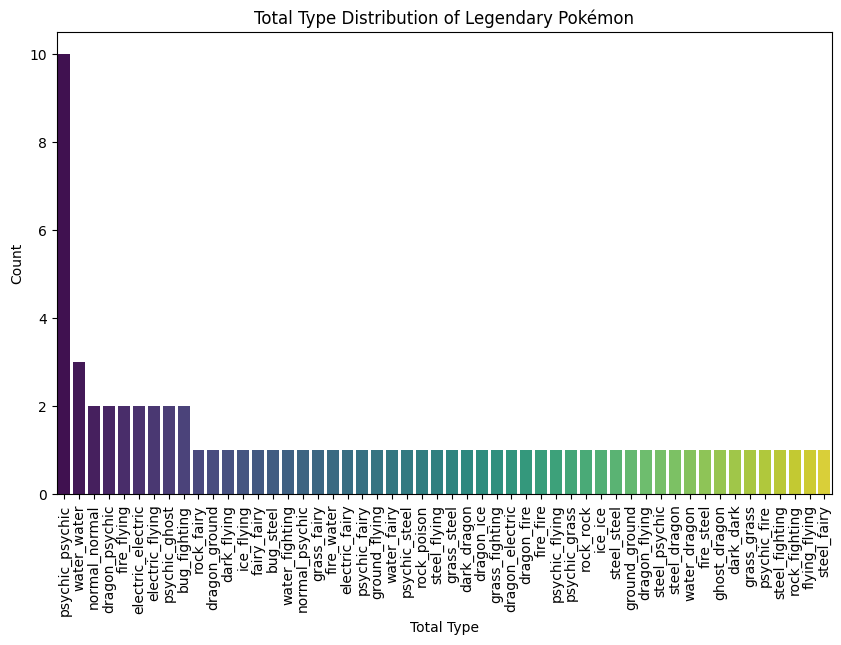

In [30]:
# Filter for legendary Pokémon
legendary_pokemon = df[df['is_legendary'] == 1]

# Count occurrences of each total type
total_type_counts = legendary_pokemon['type'].value_counts()

# Plot the distribution of total types
plt.figure(figsize=(10, 6))
sns.barplot(x=total_type_counts.index, y=total_type_counts.values, palette="viridis")
plt.xlabel('Total Type')
plt.ylabel('Count')
plt.title('Total Type Distribution of Legendary Pokémon')
plt.xticks(rotation=90)

# Display the plot
plt.show()

* If a pokemon have primary type as <b>"psychic"</b> then it has a very high chance of being a legendary pokemon.
* If a pokemon have secondary type as <b>"flying"</b> then it has a very high chance of being a legendary pokemon.
* If a pokemon have primary and secondary type as follows then it has a good chance of being a legendary pokemon as well:
    * Dragon and Psychic type
    * Fire and Flying type
    * Electric and Flying type
    * Psychic and Ghost type
    * Bug anf Fighting type
 

### 9. How Speed correlate with various base stats?

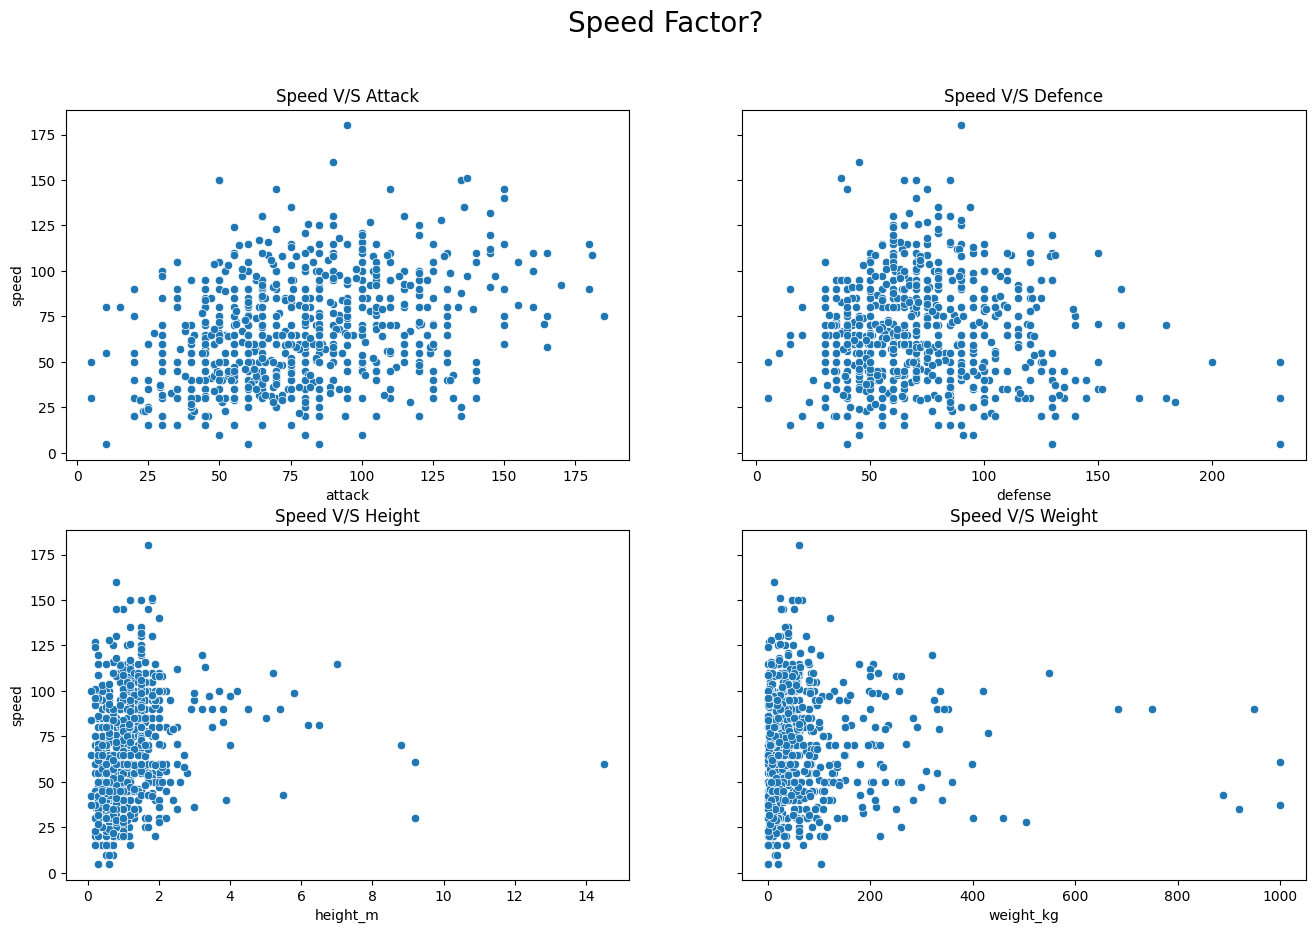

In [31]:
fig,axes = plt.subplots(2,2,figsize=(16,10),sharey=True)
sns.scatterplot(x='attack', y='speed', data=df,ax=axes[0,0])
axes[0,0].set_title("Speed V/S Attack")
sns.scatterplot(x='defense', y='speed', data=df, ax=axes[0, 1])
axes[0,1].set_title("Speed V/S Defence")
sns.scatterplot(x='height_m', y='speed', data=df, ax=axes[1, 0])
axes[1,0].set_title("Speed V/S Height")
sns.scatterplot(x='weight_kg', y='speed', data=df, ax=axes[1, 1])
axes[1,1].set_title("Speed V/S Weight")
fig.suptitle("Speed Factor?", size=20)
plt.show()

<i>Insights from the above plots:<p>
* Height of pokemons highly affects the speed (Less Height --> High speed)
* Height also highly affects attack capacity (less height --> high attack power)
* For most pokemons, Defense moderately correlates to Height
* Also, we can see that some pokemons with moderate height have high base total

### 10. How Weight correlate with various base stats?

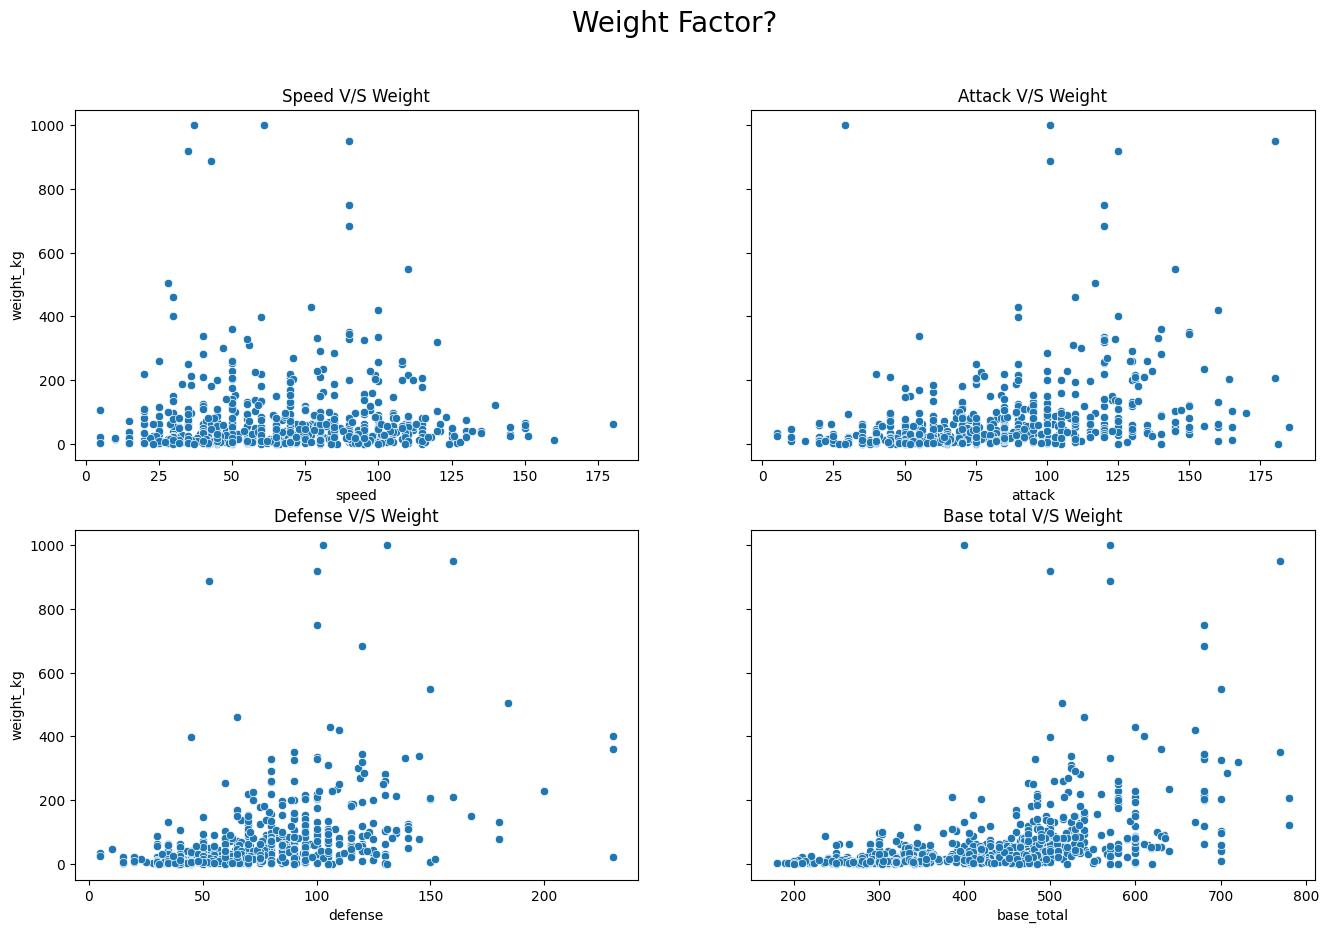

In [32]:
fig,axes = plt.subplots(2,2,figsize=(16,10),sharey=True)
sns.scatterplot(x='speed', y='weight_kg', data=df,ax=axes[0,0])
axes[0,0].set_title("Speed V/S Weight")
sns.scatterplot(x='attack', y='weight_kg', data=df, ax=axes[0, 1])
axes[0,1].set_title("Attack V/S Weight")
sns.scatterplot(x='defense', y='weight_kg', data=df, ax=axes[1, 0])
axes[1,0].set_title("Defense V/S Weight")
sns.scatterplot(x='base_total', y='weight_kg', data=df, ax=axes[1, 1])
axes[1,1].set_title("Base total V/S Weight")
fig.suptitle("Weight Factor?", size=20)
plt.show()

<i>Insights from the above plots:<p>
* High-weight pokemons are slower, while low-weight ones are faster. Some high-weight Pokemon have more speed, likely flying types.
* Heavyweight pokemons have better attack power,
* Moderate weight can increase defense strength
* A strong base total, weighing 100-200kgs, signifies a pokemon's strength.

### 11. Genderless Legendary Pokemon

In [33]:
legendary_counts = df[df['is_legendary'] == 1]['genderless'].value_counts()
print(legendary_counts)

genderless
1    63
0     7
Name: count, dtype: int64


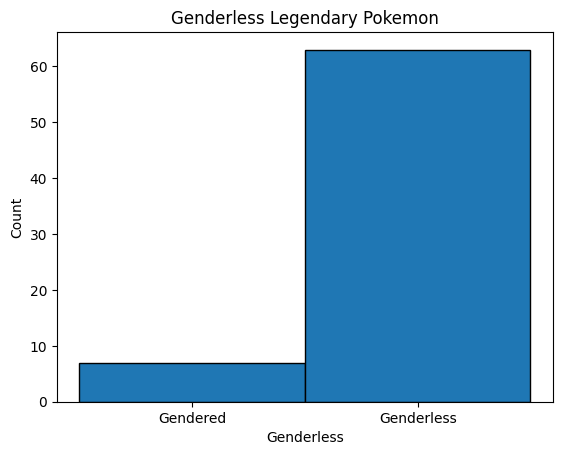

In [34]:
plt.hist(df[df['is_legendary'] == 1]['genderless'],bins=2,edgecolor='black')
plt.title('Genderless Legendary Pokemon') 
plt.xlabel('Genderless') 
plt.ylabel('Count')
plt.xticks([0.25, 0.75], ['Gendered', 'Genderless']) 
plt.show()

### 12. Capture Rate vs Base Total

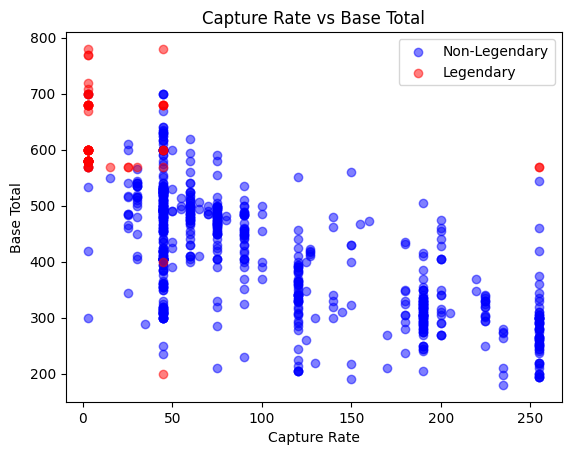

In [35]:
# Tạo biểu đồ phân tán cho Non-Legendary
plt.scatter(df[df['is_legendary'] == 0]['capture_rate'], 
            df[df['is_legendary'] == 0]['base_total'], 
            alpha=0.5, 
            color='blue', 
            label='Non-Legendary')

# Tạo biểu đồ phân tán cho Legendary
plt.scatter(df[df['is_legendary'] == 1]['capture_rate'], 
            df[df['is_legendary'] == 1]['base_total'], 
            alpha=0.5, 
            color='red', 
            label='Legendary')

plt.title('Capture Rate vs Base Total')  
plt.xlabel('Capture Rate')  
plt.ylabel('Base Total')  

# Thêm chú thích
plt.legend()

plt.show()  # Hiển thị biểu đồ


$ \implies $ As you can see, legendary Pokemon tend to have a higher <b>base_total</b> and a lower <b>capture_rate</b>.

# Classifying Legendary or not?

In [36]:
featured_df = df[['attack', 'base_egg_steps', 'base_total','defense', 'experience_growth',
                  'height_m','hp', 'weight_kg','sp_attack','sp_defense','speed','tot_abilities',
                  'is_legendary']]
featured_df

,attack,base_egg_steps,base_total,defense,experience_growth,height_m,hp,weight_kg,sp_attack,sp_defense,speed,tot_abilities,is_legendary
0,49,5120,318,49,1059860,0.7,45,6.9,65,65,45,2,0
1,62,5120,405,63,1059860,1.0,60,13.0,80,80,60,2,0
2,100,5120,625,123,1059860,2.0,80,100.0,122,120,80,2,0
3,52,5120,309,43,1059860,0.6,39,8.5,60,50,65,2,0
4,64,5120,405,58,1059860,1.1,58,19.0,80,65,80,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,101,30720,570,103,1250000,9.2,97,999.9,107,101,61,1,1
797,181,30720,570,131,1250000,0.3,59,0.1,59,31,109,1,1
798,101,30720,570,53,1250000,5.5,223,888.0,97,53,43,1,1
799,107,30720,600,101,1250000,2.4,97,230.0,127,89,79,1,1


In [37]:
featured_df.is_legendary.value_counts()

is_legendary
0    731
1     70
Name: count, dtype: int64

In [38]:
is_legendary_0, is_legendary_1 = featured_df.is_legendary.value_counts()

### Undersampling

In [39]:
#divide by class
df_class_0 = featured_df[featured_df['is_legendary'] == 0]
print(df_class_0.shape)
df_class_1 = featured_df[featured_df['is_legendary'] == 1]
print(df_class_1.shape)

(731, 13)
(70, 13)


In [40]:
df_class_0_under = df_class_0.sample(n=500)
df_test = pd.concat([df_class_0_under, df_class_1], axis = 0).reset_index(drop=True)
df_test

,attack,base_egg_steps,base_total,defense,experience_growth,height_m,hp,weight_kg,sp_attack,sp_defense,speed,tot_abilities,is_legendary
0,65,5120,520,107,1000000,0.3,50,0.3,105,107,86,1,0
1,72,5120,292,35,1059860,0.7,50,15.2,35,35,65,3,0
2,63,5120,495,152,1000000,0.7,50,14.5,53,142,35,3,0
3,110,10240,600,125,1250000,1.6,75,78.2,100,105,85,3,0
4,60,5120,545,126,800000,1.1,103,31.0,80,126,50,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,101,30720,570,103,1250000,9.2,97,999.9,107,101,61,1,1
566,181,30720,570,131,1250000,0.3,59,0.1,59,31,109,1,1
567,101,30720,570,53,1250000,5.5,223,888.0,97,53,43,1,1
568,107,30720,600,101,1250000,2.4,97,230.0,127,89,79,1,1


### Oversampling

In [41]:
x = df_test.drop('is_legendary', axis=1)
y = df_test['is_legendary']

In [42]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)
print(y_sm.value_counts())

df_test_1=  pd.concat([pd.DataFrame(x_sm), pd.DataFrame(y_sm, columns=['is_legendary'])], axis=1)
df_test_1.sample(10)

is_legendary
0    500
1    500
Name: count, dtype: int64


,attack,base_egg_steps,base_total,defense,experience_growth,height_m,hp,weight_kg,sp_attack,sp_defense,speed,tot_abilities,is_legendary
347,25,5120,330,35,800000,0.700000,60,30.600000,70,80,60,3,0
151,160,5120,630,80,1059860,1.900000,80,52.000000,130,80,100,2,0
484,130,5120,485,120,1250000,1.900000,105,120.000000,45,45,40,3,0
441,25,3840,205,50,1000000,0.600000,45,10.000000,25,25,35,1,0
432,54,5120,288,53,1000000,0.400000,53,3.500000,37,46,45,3,0
104,120,3840,485,75,1000000,1.100000,80,26.000000,75,75,60,3,0
192,65,3840,320,40,1059860,0.400000,45,4.300000,60,40,70,2,0
758,97,30720,575,70,1250000,2.586438,80,79.422205,158,75,92,2,1
714,86,20480,580,73,1250000,1.938373,90,186.442103,105,111,112,1,1
606,104,30720,680,115,1250000,4.707795,106,210.023226,97,154,102,2,1


In [43]:
print('Original dataset shape:', featured_df.is_legendary.value_counts())
print('Resampled dataset shape:', df_test.is_legendary.value_counts())
print('Final dataset shape:', y_sm.value_counts())

Original dataset shape: is_legendary
0    731
1     70
Name: count, dtype: int64
Resampled dataset shape: is_legendary
0    500
1     70
Name: count, dtype: int64
Final dataset shape: is_legendary
0    500
1    500
Name: count, dtype: int64


In [44]:
df_test_1.to_csv('df_test_1.csv', index=False)

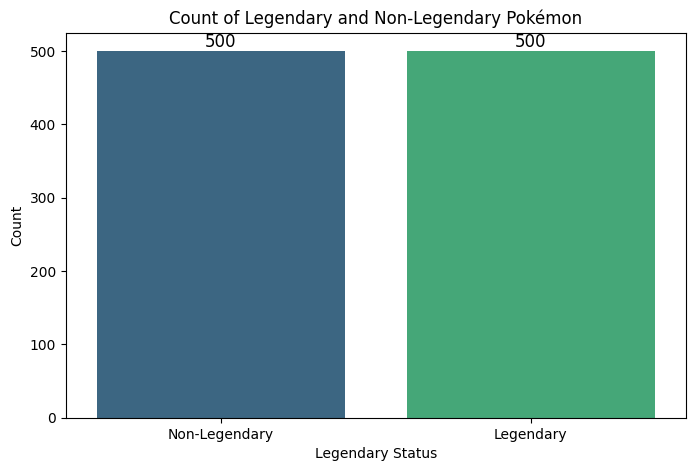

In [45]:
legendary_counts = df_test_1['is_legendary'].value_counts()

plt.figure(figsize=(8, 5))
bar = sns.barplot(x=legendary_counts.index, y=legendary_counts.values, palette="viridis")
plt.xlabel('Legendary Status')
plt.ylabel('Count')
plt.title('Count of Legendary and Non-Legendary Pokémon')
plt.xticks(ticks=[0, 1], labels=['Non-Legendary', 'Legendary'])

for i in range(len(legendary_counts)):
    bar.text(i, legendary_counts.values[i] + 0.1, legendary_counts.values[i], ha='center', va='bottom', fontsize=12)

plt.show()

In [46]:
df_test_1.shape

(1000, 13)

In [47]:
df_test_1.duplicated().sum()

1

In [48]:
df_test_1.head()

,attack,base_egg_steps,base_total,defense,experience_growth,height_m,hp,weight_kg,sp_attack,sp_defense,speed,tot_abilities,is_legendary
0,65,5120,520,107,1000000,0.3,50,0.3,105,107,86,1,0
1,72,5120,292,35,1059860,0.7,50,15.2,35,35,65,3,0
2,63,5120,495,152,1000000,0.7,50,14.5,53,142,35,3,0
3,110,10240,600,125,1250000,1.6,75,78.2,100,105,85,3,0
4,60,5120,545,126,800000,1.1,103,31.0,80,126,50,3,0


## Scaling

In [49]:
df_test_1 = (df_test_1 - df_test_1.min())/(df_test_1.max() - df_test_1.min())
df_test_1.head()

,attack,base_egg_steps,base_total,defense,experience_growth,height_m,hp,weight_kg,sp_attack,sp_defense,speed,tot_abilities,is_legendary
0,0.340909,0.130435,0.566667,0.453333,0.384615,0.013889,0.163265,0.000200,0.516304,0.414286,0.462857,0.0,0.0
1,0.380682,0.130435,0.186667,0.133333,0.442173,0.041667,0.163265,0.015103,0.135870,0.071429,0.342857,0.4,0.0
2,0.329545,0.130435,0.525000,0.653333,0.384615,0.041667,0.163265,0.014403,0.233696,0.580952,0.171429,0.4,0.0
3,0.596591,0.304348,0.700000,0.533333,0.625000,0.104167,0.265306,0.078116,0.489130,0.404762,0.457143,0.4,0.0
4,0.312500,0.130435,0.608333,0.537778,0.192308,0.069444,0.379592,0.030906,0.380435,0.504762,0.257143,0.4,0.0


In [50]:
x1 = df_test_1.drop('is_legendary', axis=1)
y2 = df_test_1['is_legendary']

In [51]:
# Chia dữ liệu thành train và test set
x_train, x_test, y_train, y_test = train_test_split(x1, y2, test_size=0.2, random_state=15, stratify=y2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 12), (200, 12), (800,), (200,))

In [52]:
y_train.value_counts()

is_legendary
1.0    400
0.0    400
Name: count, dtype: int64

In [53]:
# Kiểm tra số lượng đặc trưng
features = x_train.shape[1]
print("Number of features in x_train:", features)

Number of features in x_train: 12


In [54]:
x_test.value_counts()

attack    base_egg_steps  base_total  defense   experience_growth  height_m  hp        weight_kg  sp_attack  sp_defense  speed     tot_abilities
0.085227  0.043478        0.116667    0.200000  0.192308           0.020833  0.244898  0.008402   0.054348   0.142857    0.200000  0.4              1
0.579545  1.000000        0.700000    0.444444  0.625000           0.147334  0.334694  0.221025   0.635870   0.328571    0.405714  0.0              1
0.556818  1.000000        0.833333    0.524444  0.625000           0.317209  0.428571  0.220083   0.467391   0.542857    0.577143  0.0              1
                          0.873333    0.497778  0.625000           0.324154  0.795918  0.276475   0.461957   0.357143    0.462857  0.0              1
0.568182  0.130435        0.500000    0.377778  0.384615           0.055556  0.244898  0.018404   0.380435   0.333333    0.228571  0.2              1
                                                                                                         

### Implementing Support Vector Machine Classifier

In [55]:
class SVM:
  def __init__(self, kernel='linear', C=10000.0, max_iter=100, degree=3, gamma=1):
    self.kernel = {'poly'  : lambda x,y: np.dot(x, y.T)**degree,
                   'rbf'   : lambda x,y: np.exp(-gamma*np.sum((y - x[:,np.newaxis])**2, axis=-1)),
                   'linear': lambda x,y: np.dot(x, y.T)}[kernel]
    self.C = C
    self.max_iter = max_iter
  def restrict_to_square(self, t, v0, u):
    t = (np.clip(v0 + t*u, 0, self.C) - v0)[1]/u[1]
    return (np.clip(v0 + t*u, 0, self.C) - v0)[0]/u[0]
  def fit(self, x, y):
    self.x = np.array(x, dtype=float)
    self.y = np.array(y * 2 - 1, dtype=float)
    self.lambdas = np.zeros_like(self.y, dtype=float)
    self.K = self.kernel(self.x, self.x) * self.y[:,np.newaxis] * self.y  

    for _ in range(self.max_iter):
      for idxM in range(len(self.lambdas)):
        idxL = np.random.randint(0, len(self.lambdas))
        Q = self.K[[[idxM, idxM], [idxL, idxL]], [[idxM, idxL], [idxM, idxL]]]
        v0 = self.lambdas[[idxM, idxL]]
        k0 = 1 - np.sum(self.lambdas * self.K[[idxM, idxL]], axis=1)
        u = np.array([-self.y[idxL], self.y[idxM]])
        t_max = np.dot(k0, u) / (np.dot(np.dot(Q, u), u) + 1E-15)
        self.lambdas[[idxM, idxL]] = v0 + u * self.restrict_to_square(t_max, v0, u) 
      
    idx, = np.nonzero(self.lambdas > 1E-15)
    self.b = np.mean((1.0 - np.sum(self.K[idx] * self.lambdas, axis=1)) * self.y[idx])
  def decision_function(self, x):
    x = np.array(x, dtype=float)  # Chuyển đổi thành numpy array
    return np.sum(self.kernel(x, self.x) * self.y * self.lambdas, axis=1) + self.b
  def predict(self, X):
    return (np.sign(self.decision_function(X)) + 1) // 2

In [56]:
# Huấn luyện model SVM trên dữ liệu đã được resample
svm = SVM(kernel='rbf', C=100, gamma=1)
svm.fit(x_train, y_train)

In [57]:
# Dự đoán trên tập test
y_pred_svm = svm.predict(x_test)
y_pred_svm

array([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.])

Accuracy of SVM model:  0.99
Precision of SVM model:  0.98
Recall of SVM model:  1.00

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       100
         1.0       0.98      1.00      0.99       100

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



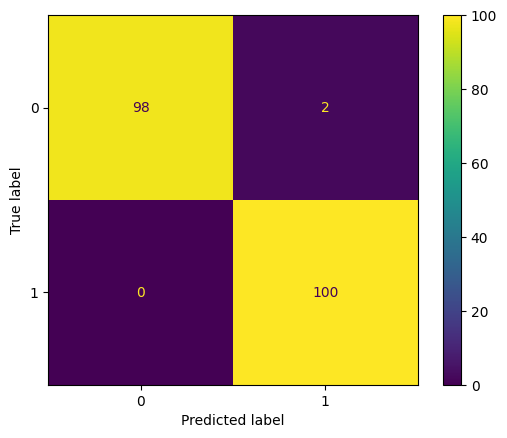

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Ma trận nhầm lẫn
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_display_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['0', '1'])
cm_display_svm.plot()

# Đánh giá model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

print(f'Accuracy of SVM model: {accuracy_svm: .2f}')
print(f'Precision of SVM model: {precision_svm: .2f}')
print(f'Recall of SVM model: {recall_svm: .2f}')
print('\nClassification Report:')
print(classification_report_svm)

In [59]:
df_test_1

,attack,base_egg_steps,base_total,defense,experience_growth,height_m,hp,weight_kg,sp_attack,sp_defense,speed,tot_abilities,is_legendary
0,0.340909,0.130435,0.566667,0.453333,0.384615,0.013889,0.163265,0.000200,0.516304,0.414286,0.462857,0.0,0.0
1,0.380682,0.130435,0.186667,0.133333,0.442173,0.041667,0.163265,0.015103,0.135870,0.071429,0.342857,0.4,0.0
2,0.329545,0.130435,0.525000,0.653333,0.384615,0.041667,0.163265,0.014403,0.233696,0.580952,0.171429,0.4,0.0
3,0.596591,0.304348,0.700000,0.533333,0.625000,0.104167,0.265306,0.078116,0.489130,0.404762,0.457143,0.4,0.0
4,0.312500,0.130435,0.608333,0.537778,0.192308,0.069444,0.379592,0.030906,0.380435,0.504762,0.257143,0.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.778409,1.000000,0.851667,0.346667,0.625000,0.107970,0.285714,0.060323,0.836957,0.495238,0.525714,0.0,1.0
996,0.806818,1.000000,0.695000,0.391111,0.625000,0.090542,0.310204,0.062470,0.494565,0.266667,0.497143,0.2,1.0
997,0.619318,0.652174,0.666667,0.346667,0.625000,0.127652,0.330612,0.237034,0.369565,0.400000,0.588571,0.0,1.0
998,0.539773,1.000000,0.671667,0.346667,0.625000,0.082873,0.293878,0.051827,0.532609,0.338095,0.640000,0.2,1.0


In [60]:
df_copy0 = pd.read_csv('df_resampled1.csv')

In [61]:
df_copy0.describe().T

,count,mean,std,min,25%,50%,75%,max
attack,1000.0,9.211400e+01,33.470095,5.0,67.00,9.300000e+01,1.162500e+02,185.0
base_egg_steps,1000.0,1.582884e+04,11932.352051,1280.0,5120.00,7.680000e+03,3.072000e+04,30720.0
base_total,1000.0,5.152640e+02,140.096450,180.0,405.00,5.700000e+02,6.000000e+02,780.0
defense,1000.0,8.332900e+01,28.025885,5.0,62.00,8.600000e+01,1.020000e+02,200.0
experience_growth,1000.0,1.142744e+06,146639.280709,600000.0,1000000.00,1.250000e+06,1.250000e+06,1640000.0
height_m,1000.0,1.676083e+00,1.376193,0.1,0.70,1.300000e+00,1.975575e+00,9.2
hp,1000.0,8.055200e+01,26.653399,20.0,60.00,8.000000e+01,9.825000e+01,223.0
weight_kg,1000.0,1.186030e+02,173.886240,0.1,15.45,5.429320e+01,1.862488e+02,999.9
sp_attack,1000.0,9.254400e+01,38.121087,10.0,60.00,9.400000e+01,1.210000e+02,194.0
sp_defense,1000.0,8.549600e+01,29.851149,20.0,63.75,8.800000e+01,1.050000e+02,200.0


In [62]:
x3_s = df_copy0.drop(columns=['is_legendary', 'name', 'type', 'generation'])
y4 = df_copy0['is_legendary']


In [63]:
import pickle


scaler = StandardScaler()
x3 = scaler.fit_transform(x3_s)

x_train1, x_test1, y_train1, y_test1 = train_test_split(x3, y4, test_size=0.2, random_state=13, stratify=y4)

model = SVC()
model.fit(x_train1, y_train1)

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
